# Description

In this notebook you'll find a way to download the data.  
Both data with jet and without are downloaded here and are stored in the previously defined folder : data1 and data0 respectively.  
The steps are the following :  
- Importing csv file that contain the date and the cutout wanted for the image
- Making the request to the JSOC server for the wanted duration (30 images)
- Getting the numpy array from the requested files
- Transforming the array to perform a MaxPool2D (convolution over the image to deacrease its size from 500x500 to 166x166)
- Storing the image into a numpy array using a compressed version  


**Somes infos :**  
`Total number of events` = 1766  
`Downloading rate` : 2mins / event --> total = 59 hours (2,5 days !!!!)  
`File data storage` = 900 Ko  
`Total storage` = 1,6 Go   

Problem : Some event, when requesting the files, found only 29 files and not 30 ? why ?  
   idk maybe a loss in the jsoc database...

   

# Import functions and libraries

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import clear_output
import time

from functions_AIA import *

# Animations
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from astropy.visualization import ImageNormalize, SqrtStretch

# Run AIA requests

## First the data with jet (data1)

In [5]:
data1=load_data()

In [ ]:
num_images=30
jsoc_email="adrien.joliat@bluewin.ch"

events_list = data1.iloc[27:31]
a=0

for i in events_list.index:
    a+=1
    files = get_images(data1.iloc[i], num_images, jsoc_email) # selects data line i
    # "files" is (class <parfive>) and contains N <HDUList> objects (where N is the nb of images in the sequence) 
    # that we open as "f". The attribute f.data returns a numpy array in our case, bc the data is an image.
    # sequence_array is a 3D array of shape (166, 166, N) which contains all the pixel values for one line of data (~ 1 event)
    sequence_array = array_file(files) #torch array of the whole sequency event

    #Save the array
    np.savez_compressed("./data1/"+str(i)+".npz" , sequence_array)
    

    #Remove images
    for j in range(len(files)):
        os.remove(files[j])

    clear_output(wait=False)
    
    
    # Check the size of final array
    print(f"Download = {i}/{events_list.index.max()} and array ={sequence_array.shape}")
   

## Secondly, data without jet (data0)

In [ ]:
data0=load_data_nojet()
num_images=30
jsoc_email="adrien.joliat@bluewin.ch"

events_list = data0.iloc[480:481]
a=0
for i in events_list.index:
    a+=1
    files = get_images(data0.iloc[i], num_images, jsoc_email) # selects data line i
    # "files" is (class <parfive>) and contains N <HDUList> objects (where N is the nb of images in the sequence) 
    # that we open as "f". The attribute f.data returns a numpy array in our case, bc the data is an image.
    # sequence_array is a array of shape (166, 166, N) which contains all the pixel values for one line of data (~ 1 event)
    sequence_array = array_file(files) #torch array of the whole sequency event

    #Save the array
    np.savez_compressed("./data0/"+str(i)+".npz" , sequence_array)

    #Remove images
    for j in range(len(files)):
        os.remove(files[j])
    
    # Check the size of final array
    print(f"Download = {a}/{len(events_list.index)} and array ={sequence_array.shape}")

## Access data 

In [20]:
archive= np.load("./data1/802.npz")
array=archive["arr_0"]

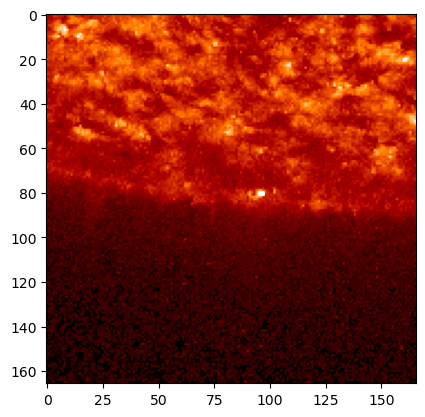

In [21]:
# Create a figure and axis
fig = plt.figure()

# Initialize the animation with an empty frame
#im = plt.imshow(np.zeros((166, 166)), cmap='gray', norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))
vmin, vmax = np.percentile(array, [1, 99.9])
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())
im = plt.imshow(np.zeros(array.shape[:2]), cmap='sdoaia304', norm=norm)

# Function to update the animation frame
def update(frame):
    im.set_data(array[:, :, frame])
    return im,

# Create the animation
ani = FuncAnimation(fig, update, frames=30, interval=100)  # 100 milliseconds per frame

# Display the animation as a clickable animation in the notebook
HTML(ani.to_jshtml())

# Verify Images Shapes

In [14]:
a=0
for i in range(882):
    archive= np.load(f"./data1/{i}.npz")
    array=archive["arr_0"]
    #print(array.shape)
    if array.shape!=(166,166,30):
        print(f"The event {i} has not a conform shape : {array.shape}")
        a+=1
print(a)
        

The event 27 has not a conform shape : (166, 166, 29)
The event 28 has not a conform shape : (166, 166, 27)
The event 30 has not a conform shape : (166, 166, 29)
The event 63 has not a conform shape : (166, 166, 6)
The event 64 has not a conform shape : (166, 166, 5)
The event 65 has not a conform shape : (166, 166, 5)
The event 66 has not a conform shape : (166, 166, 25)
The event 94 has not a conform shape : (166, 166, 6)
The event 95 has not a conform shape : (166, 166, 6)
The event 142 has not a conform shape : (166, 166, 21)
The event 454 has not a conform shape : (166, 166, 27)
The event 619 has not a conform shape : (166, 166, 18)
The event 620 has not a conform shape : (166, 166, 18)
The event 648 has not a conform shape : (166, 166, 12)
The event 671 has not a conform shape : (166, 166, 29)
The event 726 has not a conform shape : (166, 166, 18)
The event 760 has not a conform shape : (166, 166, 22)
17


In [13]:
event1_not_conform=[63,64,65,94,95,619,620,648,726,760]
df_not_conform=data1.iloc[event1_not_conform]
df_not_conform["Number_of_image (Should have been 30)"]=[6,5,5,6,6,18,18,12,18,22]
df_not_conform.to_csv("./Jet_events_non_conform.csv", index=True)

C:\Users\Adrien\AppData\Local\Temp\ipykernel_28656\2224595885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_conform["Number_of_image (Should have been 30)"]=[6,5,5,6,6,18,18,12,18,22]


In [15]:
a=0
for i in range(882):
    if i in [480]: #Event 480 cannot be downloaded
        continue
    archive= np.load(f"./data0/{i}.npz")
    array=archive["arr_0"]
    #print(array.shape)
    if array.shape!=(166,166,30):
        a+=1
        print(f"The event {i} has not a conform shape : {array.shape}")
print(a)

The event 48 has not a conform shape : (166, 166, 18)
The event 60 has not a conform shape : (166, 166, 27)
The event 78 has not a conform shape : (166, 166, 27)
The event 89 has not a conform shape : (166, 166, 0)
The event 90 has not a conform shape : (166, 166, 29)
The event 92 has not a conform shape : (166, 166, 28)
The event 94 has not a conform shape : (166, 166, 28)
The event 99 has not a conform shape : (166, 166, 29)
The event 116 has not a conform shape : (166, 166, 6)
The event 141 has not a conform shape : (166, 166, 6)
The event 215 has not a conform shape : (166, 166, 6)
The event 219 has not a conform shape : (166, 166, 29)
The event 233 has not a conform shape : (166, 166, 6)
The event 275 has not a conform shape : (166, 166, 29)
The event 289 has not a conform shape : (166, 166, 28)
The event 302 has not a conform shape : (166, 166, 6)
The event 315 has not a conform shape : (166, 166, 29)
The event 317 has not a conform shape : (166, 166, 0)
The event 321 has not a c

In [ ]:
display(data1.iloc[63:66])
display(data1.iloc[94:96])